In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('data/revenue-data.csv')

In [7]:
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,GCSE,Public Sector,Female,North West,22306.84
996,54,155.42,231.17,5,Other,Private sector,Male,Wales,27704.97
997,22,2376.10,287.15,11,Other,Private sector,Male,South East,62542.89
998,49,4355.04,27.78,0,Degree,Private sector,Male,Northern Ireland,96745.84


In [44]:
#feature variables
x = data.drop(['Education'], axis=1)
x = x.drop(['WorkType'], axis=1)
x = x.drop(['Sex'], axis=1)
x = x.drop(['Region'], axis=1)
x

,Age,SiteSpending,SiteTime,RecommendImpression,Salary
0,32,314.06,30.14,0,60173.49
1,20,3758.36,149.36,4,42965.45
2,36,601.72,21.87,0,54924.41
3,21,44.89,182.80,9,26734.99
4,24,614.80,194.34,0,15325.23
...,...,...,...,...,...
995,56,177.67,272.87,5,22306.84
996,54,155.42,231.17,5,27704.97
997,22,2376.10,287.15,11,62542.89
998,49,4355.04,27.78,0,96745.84


In [45]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [46]:
dbscan = DBSCAN(eps = 1, min_samples = 8)

In [47]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [48]:
dbscan.fit(scaled_data)
label = dbscan.labels_
import numpy as np
np.unique(label)

array([-1,  0,  1,  2], dtype=int64)

In [49]:
x["cluster_id"] = label
x.cluster_id.value_counts()

 0    901
-1     83
 1     10
 2      6
Name: cluster_id, dtype: int64

In [50]:
x

,Age,SiteSpending,SiteTime,RecommendImpression,Salary,cluster_id
0,32,314.06,30.14,0,60173.49,0
1,20,3758.36,149.36,4,42965.45,0
2,36,601.72,21.87,0,54924.41,0
3,21,44.89,182.80,9,26734.99,0
4,24,614.80,194.34,0,15325.23,0
...,...,...,...,...,...,...
995,56,177.67,272.87,5,22306.84,0
996,54,155.42,231.17,5,27704.97,0
997,22,2376.10,287.15,11,62542.89,-1
998,49,4355.04,27.78,0,96745.84,1


In [51]:
x.pivot_table(columns=['cluster_id'], aggfunc='size')

cluster_id
-1     83
 0    901
 1     10
 2      6
dtype: int64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SiteSpending', ylabel='SiteTime'>

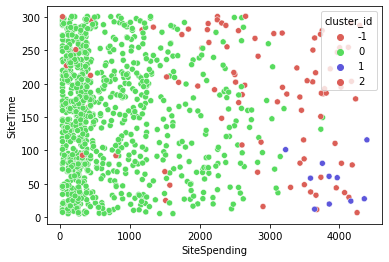

In [53]:
sns.scatterplot( x.SiteSpending, x.SiteTime, hue = x.cluster_id, palette="hls")

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SiteSpending', ylabel='SiteTime'>

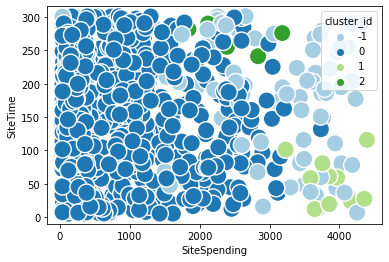

In [54]:
sns.scatterplot(x.SiteSpending, x.SiteTime, hue = x.cluster_id, palette="Paired", s = 300)